In [1]:
import AgarwalDuduikWu as ADW

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import softmax
import collections
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import xgboost as xgb

from FairReg import FairReg
from evaluation import get_stats, get_risk_unf_wrt_eps, compare_with_ADW
from evaluation_measures import DP_unfairness, prob_unfairness, prob_unfairness_summary, DP_unfairness_summary
from plots import plot_distributions_compare, plot_predictions_compare, plot_distributions, plot_predictions, plot_risk_history,plot_unfairness_history,plot_unfairness_vs_risk, plot_risk_unf_compare, plot_risk_unf_wrt_eps
from data_prep import get_lawschool_data, get_communities_data, get_frequencies

import time

# Communities and Crime

In [2]:
num=3
T=3000

eps_list = []
for i in range (4,9):
    eps_list+=[[5**(-i), 5**(-i)]]

results = compare_with_ADW(dataset='communities', 
            num=num, T=T, eps_list=eps_list, print_details = True, beta='auto', L='auto',
            TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 5  : collecting statistics for eps=[0.0016, 0.0016]
-----    1 / 3 : Our method: training completed; training time:  0.3999652862548828
-----    1 / 3 : ADW: training completed; training time:  526.0108892917633
-----    2 / 3 : Our method: training completed; training time:  0.2584991455078125
-----    2 / 3 : ADW: training completed; training time:  429.81639218330383
-----    3 / 3 : Our method: training completed; training time:  0.34644436836242676
-----    3 / 3 : ADW: training completed; training time:  646.9897727966309
---------------------------------------------------------
2 / 5  : collecting statistics for eps=[0.00032, 0.00032]
-----    1 / 3 : Our method: training completed; training time:  0.2671842575073242
-----    1 / 3 : ADW: training completed; training time:  447.2577283382416
-----    2 / 3 : Our method: training completed; training time:  0.2355794906616211
-----    2 / 3 : ADW: training completed; training time:  479.67491698265076
-----    3 / 3 : Our meth

In [3]:
results

{'base_mse_risk': 0.02295493365075915,
 'base_DP': {0: 0.4872770378651145, 1: 0.12960883783928154},
 'prob_risk': [0.07317187964617274,
  0.07390195373030324,
  0.07394957802652086,
  0.07381585548500343,
  0.07423376212189996],
 'mse_risk': [0.025830693622378165,
  0.02724062487402662,
  0.025694054056544343,
  0.02389155935174531,
  0.027961626234251167],
 'avg_unf': {0: [0.003799089467387993,
   0.0035266805414064504,
   0.0040547653773450815,
   0.004195068086708525,
   0.003849118657078931],
  1: [0.0010195639465194614,
   0.0009464573976937438,
   0.0010881798456772744,
   0.0011258329689569203,
   0.0010329903105259755]},
 'sum_unf': {0: [1.2423022558358738,
   1.1532245370399095,
   1.3259082783918414,
   1.3717872643536875,
   1.2586618008648107],
  1: [0.33339741051186383,
   0.3094915690458542,
   0.3558348095364686,
   0.3681473808489129,
   0.33778783154199404]},
 'DP_unf': {0: [0.39598576626284426,
   0.339980408620207,
   0.39141777617848145,
   0.4108592219423454,
   0.

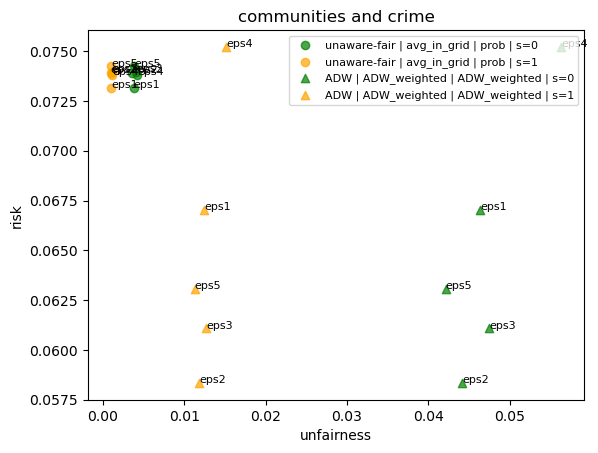

In [17]:
pairs_list = [[results['avg_unf'], results['prob_risk']],
              [results['ADW_unf'], results['ADW_risk']]]
model_list = ['unaware-fair','ADW']
unf_type_list = ['avg_in_grid','ADW_weighted']
risk_type_list = ['prob','ADW_weighted']
markers_list = ['o','^']

plot_risk_unf_compare(pairs_list=pairs_list, model_list=model_list, unf_type_list=unf_type_list, risk_type_list=risk_type_list, 
                      markers_list=markers_list, dataset='communities and crime',
                      x_label = 'unfairness', y_label = 'risk',
                      K=2, colors = ['g', 'orange'], alpha=0.7, annotate = True)

Training time

In [18]:
print('The average training time of our method is ',np.mean(results['training_time_hist']),'with std of ', np.std(results['training_time_hist']))

The average training time of our method is  0.29669357935587565 with std of  0.040179571955219484


In [20]:
print('The average training time of ADW method is ',np.mean(results['ADW_training_time_hist']),'with std of ', np.std(results['ADW_training_time_hist']))

The average training time of ADW method is  642.4115178743998 with std of  185.5385256316741


In [22]:
print('On average, our method is ',np.mean(results['ADW_training_time_hist'])/np.mean(results['training_time_hist']), ' times faster than the ADW method')

On average, our method is  2165.2356591911453  times faster than the ADW method


# Law School

In [ ]:
num=3
T=3000

eps_list = []
for i in range (4,9):
    eps_list+=[[5**(-i), 5**(-i)]]

results = compare_with_ADW(dataset='lawschool', 
            num=num, T=T, eps_list=eps_list, print_details = True, beta='auto', L='auto',
            TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)